# Assignment 2B - Binary Classification using DNN
**Classification using Deep Neural Network**:
<br> Binary Classification using Deep Neural Networks: Example - Classify movie reviews into positive" reviews and "negative" reviews, just based on the text content of the reviews. Use IMDB dataset

In [33]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
# load the dataset
df = pd.read_csv('imdb_data.csv')

In [19]:
# view
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Preprocessing

In [20]:
# encode 'positive' as 1 and 'negative' as 0
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

In [21]:
# separate features and labels
x = df['review'].values
y = df['sentiment'].values

In [22]:
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
# parameters for text processing
vocab_size = 10000  # top 10,000 words
max_len = 200  # max number of tokens per review

In [24]:
# tokenize and convert to sequence
tokenizer = Tokenizer(num_words = vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(x_train)

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

# pad sequences to ensure equal length
x_train_pad = pad_sequences(x_train_seq, maxlen=max_len, padding='post', truncating='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_len, padding='post', truncating='post')

### Build & Train DNN

In [25]:
model = Sequential()

model.add(Embedding(input_dim = vocab_size, output_dim = 64, input_length = max_len))  # embedding layer
model.add(Flatten())  # flatten the sequence of word embeddings
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # sigmoid for binary classification

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 64)           640000    
                                                                 
 flatten_3 (Flatten)         (None, 12800)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                819264    
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,459,329
Trainable params: 1,459,329
Non-trainable params: 0
_________________________________________________________________


In [26]:
# train the model
history = model.fit(
    x_train_pad, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
1125/1125 [==============================] - 9s 7ms/step - loss: 0.3889 - accuracy: 0.8142 - val_loss: 0.2995 - val_accuracy: 0.8800
Epoch 2/10
1125/1125 [==============================] - 8s 7ms/step - loss: 0.1059 - accuracy: 0.9620 - val_loss: 0.4713 - val_accuracy: 0.8425
Epoch 3/10
1125/1125 [==============================] - 8s 7ms/step - loss: 0.0181 - accuracy: 0.9940 - val_loss: 0.6276 - val_accuracy: 0.8555
Epoch 4/10
1125/1125 [==============================] - 9s 8ms/step - loss: 0.0129 - accuracy: 0.9954 - val_loss: 0.8128 - val_accuracy: 0.8485
Epoch 5/10
1125/1125 [==============================] - 8s 8ms/step - loss: 0.0159 - accuracy: 0.9947 - val_loss: 0.8710 - val_accuracy: 0.8410
Epoch 6/10
1125/1125 [==============================] - 8s 7ms/step - loss: 0.0085 - accuracy: 0.9971 - val_loss: 1.0003 - val_accuracy: 0.8413
Epoch 7/10
1125/1125 [==============================] - 8s 7ms/step - loss: 0.0094 - accuracy: 0.9966 - val_loss: 1.0201 - val_accuracy:

### Evaluation & Prediction

In [27]:
# evaluate the model
loss, accuracy = model.evaluate(x_test_pad, y_test, verbose=1)
print('Test Accuracy: ', accuracy)
print('Test Loss: ', loss)

313/313 [==============================] - 1s 2ms/step - loss: 1.3092 - accuracy: 0.8289
Test Accuracy:  0.8288999795913696
Test Loss:  1.3092060089111328


In [29]:
# get predicted probabilities and convert to binary labels
y_pred_prob = model.predict(x_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

313/313 [==============================] - 1s 1ms/step


### Plot

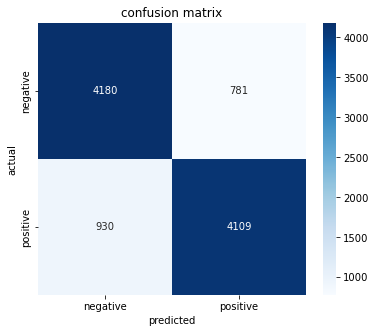

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

In [32]:
# classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.84      0.83      4961
    positive       0.84      0.82      0.83      5039

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

